In [21]:
import cv2
import os

def video_to_images(video_path, output_folder, num_images=200):
    """
    Extracts 'num_images' frames from a video and saves them as individual image files.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Get the total number of frames and frames per second (FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Safeguard: Ensure 'num_images' doesn't exceed the total frame count
    num_images = min(num_images, total_frames)
    
    # Calculate the interval between frames to capture
    interval = max(1, total_frames // num_images)
    
    count = 0
    image_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Save every 'interval' frame
        if count % interval == 0:
            image_filename = os.path.join(output_folder, f"image_{image_count+1:04d}.jpg")
            cv2.imwrite(image_filename, frame)
            image_count += 1
        
        count += 1
        
        # Stop if the desired number of images has been saved
        if image_count >= num_images:
            break
    
    # Release the video capture object
    cap.release()
    print(f"Extracted {image_count} images from {video_path}")

def process_videos(videos_folder, output_folder, num_images=200):
    """
    Processes all videos in the specified folder and extracts images.
    """
    # List all video files in the folder (supports .mp4, .avi, .mov)
    video_files = [f for f in os.listdir(videos_folder) if f.lower().endswith(('.mp4', '.avi', '.mov'))]
    
    for video_file in video_files:
        video_path = os.path.join(videos_folder, video_file)
        
        # Create a subfolder in the output folder for each video's images
        video_output_folder = os.path.join(output_folder, os.path.splitext(video_file)[0])
        
        print(f"Processing {video_file}...")
        video_to_images(video_path, video_output_folder, num_images)
        print(f"Finished processing {video_file}. Images saved to {video_output_folder}")

if __name__ == "__main__":
    # Folder containing videos
    videos_folder = "D:/jupyter/ipy/videos"  # Replace with your videos folder path
    
    # Folder where images will be saved
    output_folder = "D:/jupyter/ipy/output"  # Replace with your desired output folder path
    
    # Number of images to extract per video
    num_images = 200  # Adjust as needed
    
    # Process all videos in the folder
    process_videos(videos_folder, output_folder, num_images)


Processing Aavani.mp4...
Extracted 200 images from D:/jupyter/ipy/videos\Aavani.mp4
Finished processing Aavani.mp4. Images saved to D:/jupyter/ipy/output\Aavani
Processing Adithyan.mp4...
Extracted 200 images from D:/jupyter/ipy/videos\Adithyan.mp4
Finished processing Adithyan.mp4. Images saved to D:/jupyter/ipy/output\Adithyan
Processing Akhila.mp4...
Extracted 200 images from D:/jupyter/ipy/videos\Akhila.mp4
Finished processing Akhila.mp4. Images saved to D:/jupyter/ipy/output\Akhila
Processing Amaljith.mp4...
Extracted 200 images from D:/jupyter/ipy/videos\Amaljith.mp4
Finished processing Amaljith.mp4. Images saved to D:/jupyter/ipy/output\Amaljith
Processing Asna.mp4...
Extracted 200 images from D:/jupyter/ipy/videos\Asna.mp4
Finished processing Asna.mp4. Images saved to D:/jupyter/ipy/output\Asna
Processing Bharath Dev.mp4...
Extracted 200 images from D:/jupyter/ipy/videos\Bharath Dev.mp4
Finished processing Bharath Dev.mp4. Images saved to D:/jupyter/ipy/output\Bharath Dev
Proces

In [3]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [25]:
import os
import shutil
import random

# Define the paths
output_folder = "D:/jupyter/ipy/output"  # Replace with your output folder path
train_folder = "D:/jupyter/ipy/Train"   # Replace with your desired train folder path
test_folder = "D:/jupyter/ipy/Test"     # Replace with your desired test folder path

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get a list of all images in the output folder and its subfolders
images = []
for root, _, files in os.walk(output_folder):  # Recursively walk through subfolders
    for file in files:
        if os.path.isfile(os.path.join(root, file)):  # Ensure it's a file
            images.append(os.path.join(root, file))

# Check if there are images to process
if not images:
    print("No images found in the output folder or its subfolders.")
    exit()

# Shuffle the images
random.shuffle(images)

# Split the images into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(images))
train_images = images[:split_index]
test_images = images[split_index:]

# Function to copy files and maintain subfolder structure
def copy_images(image_list, destination_folder):
    for img_path in image_list:
        try:
            # Create the subfolder structure in the destination folder
            relative_path = os.path.relpath(img_path, output_folder)  # Get relative path
            destination_path = os.path.join(destination_folder, relative_path)
            os.makedirs(os.path.dirname(destination_path), exist_ok=True)  # Create subfolders
            shutil.copy2(img_path, destination_path)  # Copy the file
        except Exception as e:
            print(f"Error copying {img_path} to {destination_folder}: {e}")

# Copy images to Train and Test folders while preserving subfolder structure
copy_images(train_images, train_folder)
copy_images(test_images, test_folder)

print(f"Copied {len(train_images)} images to training folder and {len(test_images)} images to testing folder.")


Copied 1440 images to training folder and 360 images to testing folder.


Found 1156 images belonging to 9 classes.
Found 284 images belonging to 9 classes.


C:\Users\bharath dev\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\bharath dev\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.1695 - loss: 8.0709 - val_accuracy: 0.5423 - val_loss: 1.2930
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5501 - loss: 1.2328 - val_accuracy: 0.7465 - val_loss: 0.6649
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7948 - loss: 0.5708 - val_accuracy: 0.8521 - val_loss: 0.4475
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8481 - loss: 0.4080 - val_accuracy: 0.9261 - val_loss: 0.2822
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9191 - loss: 0.2421 - val_accuracy: 0.9437 - val_loss: 0.1911
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9409 - loss: 0.1734 - val_accuracy: 0.9155 - val_loss: 0.2084
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9072 - loss: 0.2937 - val_accuracy: 0.9190 - val_loss: 0.2214
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9505 - loss: 0.1650 - val_accuracy: 0.9331 - val_loss:

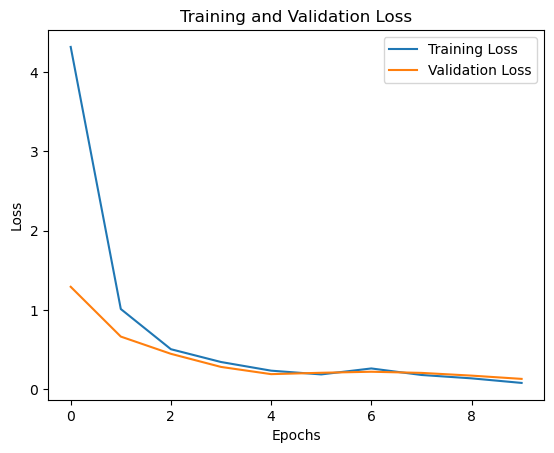

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


batch_size = 32
image_size = (256,256)
validation_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescale for validation

# Initialize ImageDataGenerator for training and validation with validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,             # Normalize pixel values to [0, 1]
    rotation_range=20,           # Randomly rotate images
    width_shift_range=0.2,       # Shift images horizontally
    height_shift_range=0.2,      # Shift images vertically
    shear_range=0.2,             # Shear transformations
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest',         # Fill missing pixels after transformations
    validation_split=0.2         # Reserve 20% of data for validation
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255,             # Only rescale for validation
    validation_split=0.2         # Reserve 20% of data for validation
)

# Load training images directly from directory
train_generator = train_datagen.flow_from_directory(
    "D:/jupyter/ipy/Train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'            # Use training subset
)

validation_generator = train_datagen.flow_from_directory(
    "D:/jupyter/ipy/Train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'          # Use validation subset
)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generators
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
model.save("D:/jupyter/detection/model-4.h5")

In [13]:
batch_size = 32
image_size = (256,256)  # Adjust to the input size of the InceptionV3 model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    "D:/jupyter/ipy/Train",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',

)
validation_generator = train_datagen.flow_from_directory(
    "D:/jupyter/ipy/Test",
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

Found 643 images belonging to 5 classes.
Found 39 images belonging to 5 classes.


In [162]:
num_classes = 5  # Replace 10 with the actual number of classes in your dataset
from keras import models
from keras import layers

model1 = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),
    # Dense layers
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')  # 4 output classes
])

# Print the summary of the model
model.summary()

C:\Users\bharath dev\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)             │ (None, 4, 4, 1664)          │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1664)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,856,518 (49.04 MB)

 Trainable params: 213,636 (834.52 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from keras import models, layers

model1 = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 135, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),

    # Dense layers
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')  # Dynamic number of classes
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

# Train the model
model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save the trained model
model1.save('D:/jupyter/ipy/Model/face_recognition_model5.h5')


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 238, 133, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 119, 66, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 117, 64, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 115, 62, 64)         │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 57, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 55, 29, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 27, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 25, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 12, 6, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,145,477 (19.63 MB)

 Trainable params: 5,145,477 (19.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.2883 - loss: 1.5040

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt
# Train the model
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [170]:
num_classes = 5 # Replace 10 with the actual number of classes in your dataset
from keras import models
from keras import layers

model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),
    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 4 output classes
])

# Print the summary of the model
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,621 (56.61 MB)

 Trainable params: 14,839,621 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4411 - loss: 1.7525 - val_accuracy: 0.6875 - val_loss: 0.8247
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 3.6868e-04 - val_accuracy: 0.8571 - val_loss: 0.3440
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 1.0000 - loss: 0.0021
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 1.0000 - loss: 9.4249e-07 - val_accuracy: 0.7188 - val_loss: 1.8751
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 1.0000 - loss: 2.9264e-06 - val_accuracy: 0.8571 - val_loss: 0.5267
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.4512e-06
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 1.0000 - loss: 1.1651e-06 - val_accuracy: 0.7500 - val_loss: 1.6922
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.7195e-07 - val_accuracy: 0.8571 - val_loss: 0.9752
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step -

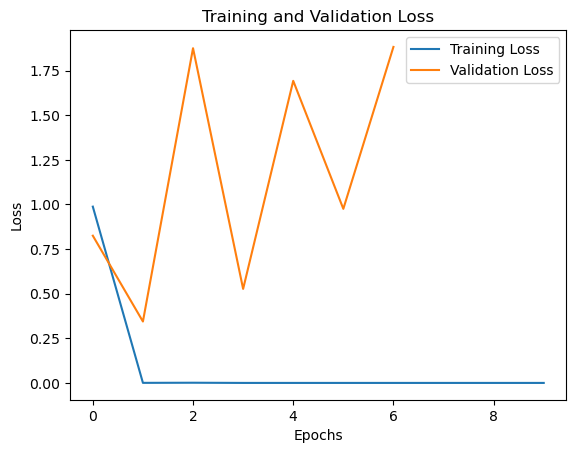

In [174]:
import matplotlib.pyplot as plt
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
num_classes = 5  # Replace 10 with the actual number of classes in your dataset
from keras import models
from keras import layers

model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),
    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 4 output classes
])

# Print the summary of the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,264,645 (4.82 MB)

 Trainable params: 1,264,645 (4.82 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
import matplotlib.pyplot as plt
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 921ms/step - accuracy: 0.3296 - loss: 1.4855 - val_accuracy: 0.7500 - val_loss: 1.2886
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9375 - loss: 0.2222 - val_accuracy: 0.7143 - val_loss: 2.0454
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 840ms/step - accuracy: 0.9598 - loss: 0.1099 - val_accuracy: 0.6875 - val_loss: 2.2764
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8571 - val_loss: 0.3138
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 887ms/step - accuracy: 1.0000 - loss: 4.8208e-04 - val_accuracy: 0.7188 - val_loss: 3.3939
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 9.4498e-05 - val_accuracy: 0.7143 - val_loss: 1.1894
Epoch 7/10
 3/40 ━━━━━━━━━━━━━━━━━━━━ 34s 932ms/step - accuracy: 1.0000 - loss: 9.4859e-05

KeyboardInterrupt: 

In [188]:
from keras.applications import DenseNet169
from keras import layers, models

# Number of output classes
num_classes = 5

# Load DenseNet-169 with pre-trained ImageNet weights (can replace with 'None' if you want to train from scratch)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers (if you're fine-tuning the top layers)
base_model.trainable = False  # Set to True if you want to fine-tune the model

# Add custom top layers
modeldens = models.Sequential([
    base_model,  # Include DenseNet-169 base
    layers.GlobalAveragePooling2D(),  # Pooling the feature map
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Print the summary of the model
modeldens.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)             │ (None, 8, 8, 1664)          │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1664)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,856,645 (49.04 MB)

 Trainable params: 213,765 (835.02 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [190]:
modeldens.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.6537 - loss: 1.0873 - val_accuracy: 1.0000 - val_loss: 0.0974
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 1.0000 - loss: 0.0669 - val_accuracy: 1.0000 - val_loss: 0.0864
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 1.0000 - loss: 0.0384
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0068
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 1.0000 -

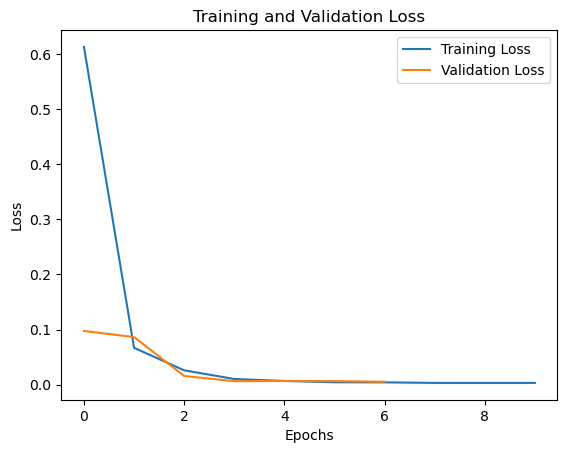

In [192]:
import matplotlib.pyplot as plt
# Train the model
history = modeldens.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [194]:
modeldens.save("D:/jupyter/ipy/Model/modeldens.h5")

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'D:/jupyter/ipy/Test',  # Change this to the directory containing your test data
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation
)

Found 360 images belonging to 9 classes.


In [66]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load model
model = load_model("D:/jupyter/detection/model-1.h5")

# Assuming you have a fixed number of samples in your test dataset
num_test_samples = len(test_generator.filenames)

# Ensure batch_size is defined earlier
batch_size = test_generator.batch_size

# Predict on test data
y_pred = model.predict(test_generator, steps=int(np.ceil(num_test_samples / batch_size)))

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Retrieve true labels from the test generator
y_true_labels = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 732ms/step
Accuracy: 0.2583
Precision: 0.1958
Recall: 0.2583
F1 Score: 0.1468


C:\Users\bharath dev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


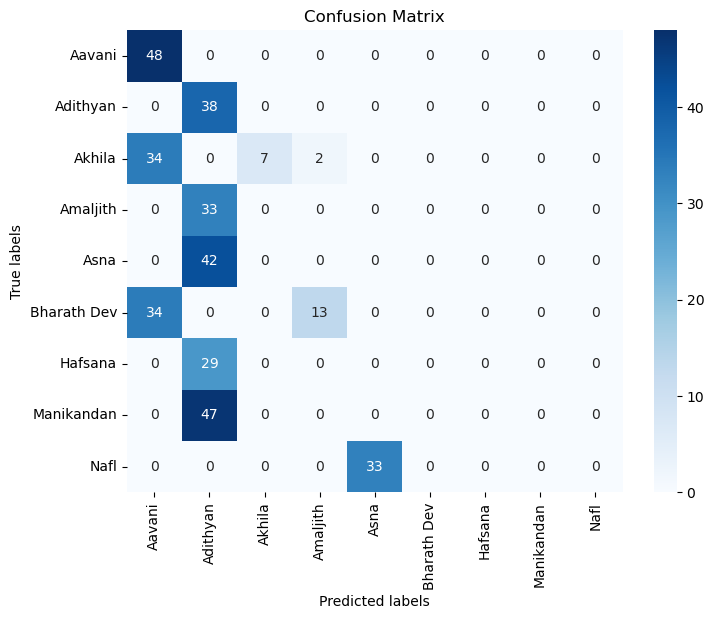

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [74]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import os

# Load the saved model
loaded_model = load_model('face_recognition_model5.h5')

# Define your test directory
test_dir = 'D:/jupyter/ipy/Test'

# Class labels
class_labels = {0: 'Aavani', 1: 'Akhila', 2: 'Bharath Dev' ,3: 'Devu'}

# Collect filenames and true labels
test_filenames = []
true_labels = []

for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):  # Assuming your images are pngs
            test_filenames.append(os.path.join(root, file))
            true_labels.append(os.path.basename(root))

# Make predictions and print true label, predicted label, and image path
predicted_labels = []
for filename, true_label in zip(test_filenames, true_labels):
    img = image.load_img(filename, target_size=(128, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_label = class_labels[predicted_class]

    predicted_labels.append(predicted_label)

    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("Image Path:", filename)
    print("-------------------------")

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
true_labels_numeric = label_encoder.fit_transform(true_labels)
predicted_labels_numeric = label_encoder.transform(predicted_labels)

# Compute metrics
accuracy = accuracy_score(true_labels_numeric, predicted_labels_numeric)
precision = precision_score(true_labels_numeric, predicted_labels_numeric, average='weighted')
recall = recall_score(true_labels_numeric, predicted_labels_numeric, average='weighted')
f1 = f1_score(true_labels_numeric, predicted_labels_numeric, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Draw confusion matrix
conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels_numeric)
print("Confusion Matrix:")
print(conf_matrix)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 6400, but received input with shape (1, 16640)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 128, 256, 3), dtype=float32)
  • training=False
  • mask=None

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.3560 - loss: 1.5477 - val_accuracy: 0.9688 - val_loss: 1.2476
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9688 - loss: 1.1511 - val_accuracy: 1.0000 - val_loss: 1.1782
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9351 - loss: 1.0581
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - accuracy: 1.0000 - loss: 0.7342 - val_accuracy: 1.0000 - val_loss: 0.7898
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 1.0000 - loss: 0.6501 - val_accuracy: 1.0000 - val_loss: 0.4639
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 0.4270 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 1.0000 - loss: 0.3750 - val_accuracy: 1.0000 - val_loss: 0.3079
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 1.0000 - loss: 0.2411 - val_accuracy: 1.0000 - val_loss: 0.2868
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 1.0000 -

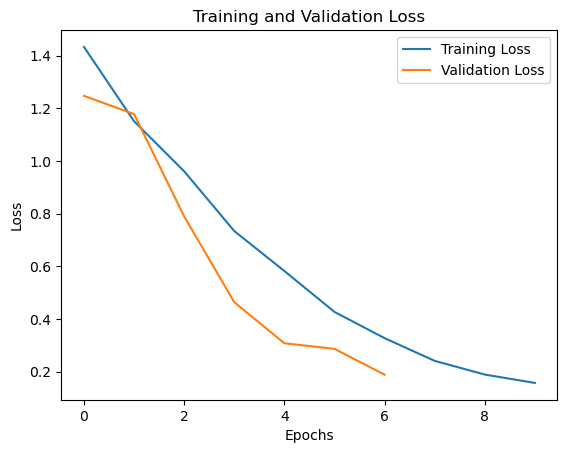

In [18]:
from keras.applications import VGG16
from keras import layers, models
import matplotlib.pyplot as plt

# Number of output classes
num_classes = 5

# Load VGG16 with pre-trained ImageNet weights (can replace with 'None' if you want to train from scratch)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers (if you're fine-tuning the top layers)
base_model.trainable = False  # Set to True if you want to fine-tune the model

# Add custom top layers
model_vgg16 = models.Sequential([
    base_model,  # Include VGG16 base
    layers.GlobalAveragePooling2D(),  # Pooling the feature map
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Print the summary of the model
model_vgg16.summary()

# Compile the model
model_vgg16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Extract the loss values for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
model_vgg16.save("D:/jupyter/ipy/Model/model_vgg162.h5")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 6, 6, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,328,613 (85.18 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.6487 - loss: 1.3264 - val_accuracy: 1.0000 - val_loss: 0.0686
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 0.0544
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 0.0080
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0266
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0026 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 8.8183e-04 - val_accuracy: 1.0000 - val_loss: 0.0193
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 7.5144e-04 - val_accuracy: 1.0000 - val_loss: 0.0278
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 1

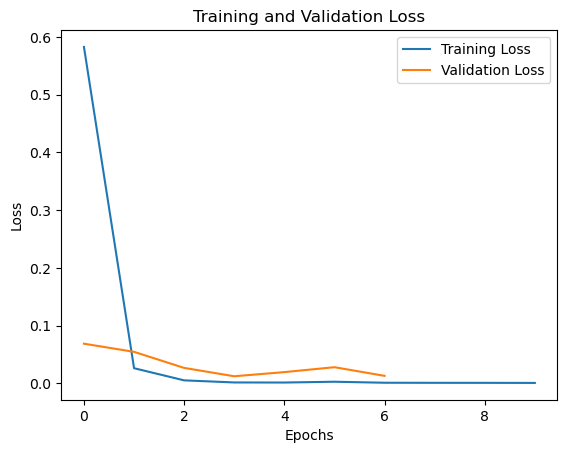

In [26]:
from keras.applications import InceptionV3
from keras import layers, models
import matplotlib.pyplot as plt

# Number of output classes
num_classes = 5

# Load InceptionV3 with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers (optional: set to True to fine-tune)
base_model.trainable = False

# Add custom top layers
model_inception = models.Sequential([
    base_model,  # Include InceptionV3 base
    layers.GlobalAveragePooling2D(),  # Pooling the feature map
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Print the summary of the model
model_inception.summary()

# Compile the model
model_inception.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Extract the loss values for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [30]:
model_inception.save("D:/jupyter/ipy/Model/model_inception2.h5")